In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

D:\anaconda\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('./datasets/Income1.csv')

In [3]:
data.head(3)

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


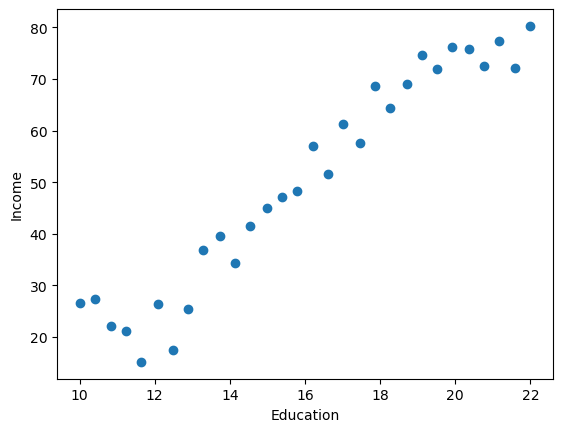

In [5]:
plt.scatter(data.Education,data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

In [6]:
X=torch.from_numpy(data.Education.to_numpy().reshape(-1,1)).type(torch.FloatTensor)
Y=torch.from_numpy(data.Income.to_numpy().reshape(-1,1)).type(torch.FloatTensor)
print(X.size(),Y.size())

torch.Size([30, 1]) torch.Size([30, 1])


In [7]:
class EIModel(nn.Module):
    def __init__(self):
        super(EIModel, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, inputs):
        logits = self.linear(inputs)
        return logits

In [8]:
model=EIModel()#实例化对象

In [9]:
loss_fn=nn.MSELoss() #定义均方误差损失计算函数
opt=torch.optim.SGD(model.parameters(),lr=0.0001) #初始化优化器

下面开始编写训练代码，对全部数据训练500次

In [16]:
for epoch in range(1000):
    for x,y in zip(X,Y):
        y_pred=model(x)  #将x作为输入值，传入模型中，然后输出y_pred预测值
        loss=loss_fn(y_pred,y)  #将输出的结果y_pred和y的值进行计算算出相差值
#         print("损失值为:{}".format(loss))
        opt.zero_grad() # 将累计的梯度置为0
        loss.backward() #反向传播损失，计算损失与模型参数之间的梯度
        opt.step()  #根据计算得到梯度优化模型参数
print('完成了')

完成了


In [14]:
print(list(model.named_parameters()))

[('linear.weight', Parameter containing:
tensor([[5.0509]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-29.7798], requires_grad=True))]


模型有两个参数，接下来将训练好的参数放到原散点图中，进行预测

此时的模型参数为
[('linear.weight', Parameter containing:
tensor([[5.1553]], requires_grad=True)), ('linear.bias', Parameter containing:
tensor([-31.7071], requires_grad=True))]


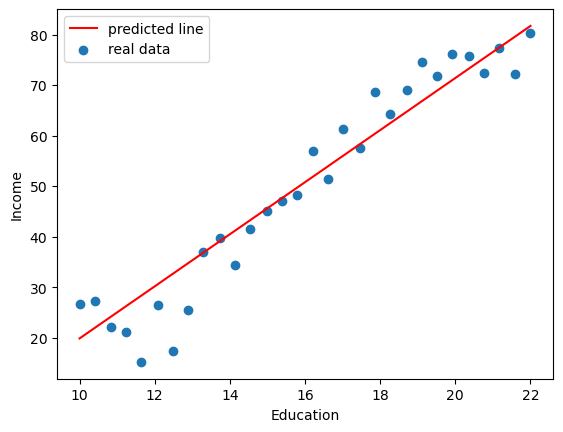

In [17]:
#绘制原数据分布散点图
plt.scatter(data.Education,data.Income,label='real data')
#绘制预测的直线，这里model(x)表示调用模型预测
#打印一下此时的模型参数
print("此时的模型参数为\n{}".format(list(model.named_parameters())))
plt.plot(X,model(X).detach().numpy(),c='r',label='predicted line')
plt.xlabel('Education')
plt.ylabel('Income')
plt.legend()
plt.show()